In [2]:
%matplotlib inline

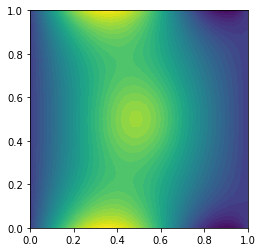

In [3]:
# Begin demo

# parameters['plotting_backend'] = 'None'

from dolfin import *

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u, interactive=True)

In [3]:
from IPython.display import HTML

In [4]:
HTML(X3DOM().html(u))

In [5]:
mesh = UnitCubeMesh(10, 10, 10)
HTML(X3DOM().html(mesh))

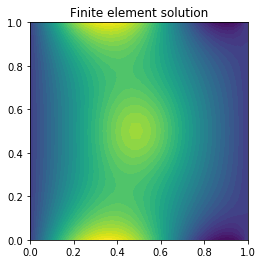

In [4]:
plot(u, title='Finite element solution')

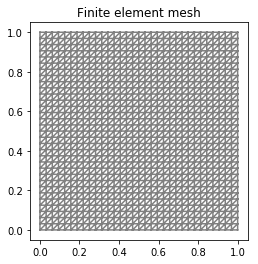

In [8]:
plot(mesh, title='Finite element mesh')

In [9]:
vtkfile = File('poisson/solution.pvd')
vtkfile << u